In [1]:
import pandas as pd
import numpy as np
import os
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/348cases_1921_FS_results.xlsx")#, sheet_name='g1rfegb12'
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['348cases_1921_FS_results.xlsx', 'FINAL3CENTER349_COMBAT1921.csv', 'FS-RFE', 'FUSCC-zscore-MI.csv', 'FUSCC.csv', 'hrfs', 'hrfs_clinic', 'HRFS_CLINIC_FS', 'HRFS_FS', 'internaltest.csv', 'internaltest1921new.csv', 'internaltest1921new_zscore-MI.csv', 'internaltest1921new_zscore.csv', 'internaltest_fe.csv', 'internaltest_label.csv', 'MIzsore1921-new20231.csv', 'new2023', 'raw', 'RFselect1921-auc-MI2023.csv', 'testrj.csv', 'testrj1921new.csv', 'testrj1921new_zscore.csv', 'testxk.csv', 'testxk1921new.csv', 'testxk1921new_zscore.csv', 'train.csv', 'train1921new.csv', 'train1921newZscore-MI.csv', 'train1921new_zscore1.csv', 'trainZscore-MI-1921-LGBfeatureimportance-1.csv', 'trainZscore-MI-1921-RFfeatureimportance-1.csv', 'trainZscore-MI-1921-XGBfeatureimportance-1.csv', 'trainZscore-MI-SBS-LGB2023.csv', 'trainZscore-MI-SBS-LR2023.csv', 'trainZscore-MI-SBS-RF2023.csv', 'trainZscore-MI-SBS-XGB2023.csv', 'trainZscore-MI-SFS-LGBM2023.csv', 'trainZscore-MI-SFS-LR2023.csv', 'trainZscore-MI-S

In [2]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [3]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'KNN20'
data = pd.read_excel("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/348cases_1921_FS_results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/FUSCC-zscore-MI.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testxk1921new_zscore.csv")
test1 = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testrj1921new_zscore.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
test1=test1[data.keys()]
test1.shape

train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/new2023/trainZscore-KNN20.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/new2023/testxkZscore-KNN20.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/new2023/testrjZscore-KNN20.csv",index=None)



In [4]:
test.shape

(63, 21)

In [5]:
test1.shape

(46, 21)

In [9]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [11]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/new2023/trainZscore-KNN20.csv")




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 21 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   CT_wavelet.HHL_firstorder_Skewness                            239 non-null    float64
 1   PET_wavelet.HHL_glszm_SizeZoneNonUniformityNormalized         239 non-null    float64
 2   CT_wavelet2.HHH_firstorder_Mean                               239 non-null    float64
 3   CT_log.sigma.3.0.mm.3D_firstorder_Kurtosis                    239 non-null    float64
 4   CT_wavelet2.HHL_firstorder_Skewness                           239 non-null    float64
 5   CT_exponential_firstorder_Minimum                             239 non-null    float64
 6   CT_wavelet.HLH_firstorder_Median                              239 non-null    float64
 7   CT_wavelet2.HLH_glcm_ClusterShade                             239 non-n

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
CT_wavelet.HHL_firstorder_Skewness,239.000,0.000,1.002,-7.632,-0.569,-0.204,0.025,0.260,0.730,1.300,2.850,3.628
PET_wavelet.HHL_glszm_SizeZoneNonUniformityNormalized,239.000,0.000,1.002,-1.933,-1.212,-0.779,-0.028,0.671,1.208,1.596,2.219,5.296
CT_wavelet2.HHH_firstorder_Mean,239.000,-0.000,1.002,-6.523,-0.781,-0.327,-0.006,0.297,0.905,1.572,2.465,5.629
CT_log.sigma.3.0.mm.3D_firstorder_Kurtosis,239.000,-0.000,1.002,-1.788,-0.978,-0.697,-0.189,0.546,1.057,1.820,2.810,5.732
CT_wavelet2.HHL_firstorder_Skewness,239.000,-0.000,1.002,-8.323,-0.611,-0.255,-0.017,0.225,0.701,1.022,2.695,6.032
CT_exponential_firstorder_Minimum,239.000,-0.000,1.002,-0.212,-0.188,-0.173,-0.143,-0.074,0.035,0.130,2.247,12.384
CT_wavelet.HLH_firstorder_Median,239.000,0.000,1.002,-3.568,-0.660,-0.260,-0.104,0.081,0.693,1.131,3.507,8.324
CT_wavelet2.HLH_glcm_ClusterShade,239.000,0.000,1.002,-4.905,-0.427,-0.189,-0.041,0.104,0.495,1.157,3.297,7.827
CT_wavelet.LLH_firstorder_Skewness,239.000,0.000,1.002,-4.965,-0.966,-0.321,0.086,0.448,0.906,1.114,2.231,4.369
PET_wavelet.LHH_firstorder_Kurtosis,239.000,0.000,1.002,-1.133,-0.816,-0.665,-0.316,0.332,1.280,2.045,3.662,5.779


In [12]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


CT_wavelet.HHL_firstorder_Skewness                              0
PET_lbp.3D.k_glcm_Imc1                                          0
PET_wavelet.HLH_glszm_SmallAreaLowGrayLevelEmphasis             0
CT_original_shape_Elongation                                    0
CT_original_shape_Flatness                                      0
CT_log.sigma.3.0.mm.3D_firstorder_10Percentile                  0
CT_wavelet.HHL_glcm_Imc1                                        0
CT_wavelet2.LLL_ngtdm_Strength                                  0
PET_wavelet.HHL_gldm_LargeDependenceLowGrayLevelEmphasis        0
CT_log.sigma.3.0.mm.3D_glszm_SizeZoneNonUniformityNormalized    0
PET_wavelet.HLH_glcm_Correlation                                0
PET_wavelet.HHL_glszm_SizeZoneNonUniformityNormalized           0
PET_wavelet.LHH_firstorder_Kurtosis                             0
CT_wavelet.LLH_firstorder_Skewness                              0
CT_wavelet2.HLH_glcm_ClusterShade                               0
CT_wavelet

In [13]:
# MODELING


# Define dependent and independent variables
y = df["label"]
X = df.drop(["label"], axis=1)

# y = df["Outcome"]
# X = df.drop(["Outcome"], axis=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.564865
Naive Bayes: 0.567181
KNN: 0.576834
SVM: 0.576062
ANN: 0.636293
CART: 0.552896
BaggedTrees: 0.571042
RF: 0.622008
AdaBoost: 0.552896
GBM: 0.664093
XGBoost: 0.608494
LightGBM: 0.664865
CatBoost: 0.690347
NGBoost: 0.649035

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.650          0.565
1          Naive Bayes           0.640          0.567
2                  KNN           0.732          0.577
3                  SVM           0.786          0.576
4                  ANN           0.981          0.636
5                 CART           1.000          0.553
6          BaggedTrees           0.993          0.571
7                   RF           1.000          0.622
8             AdaBoost           0.988          0.553
9                  GBM           1.000          0.664
10

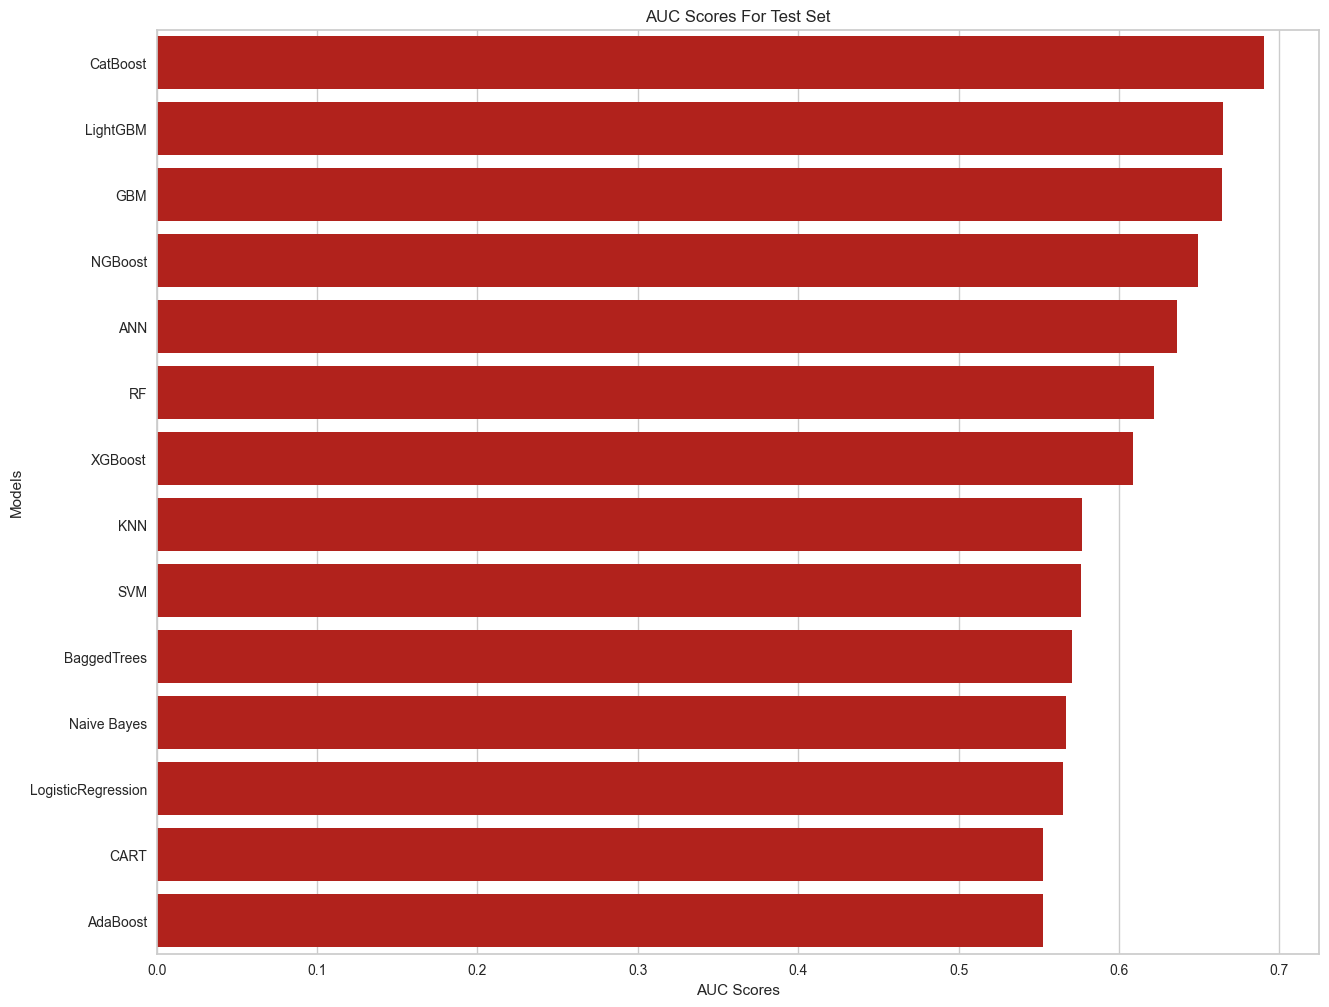

In [27]:
evaluate_classification_model_holdout(base_models)
# LogisticRegression: 0.805195
# Naive Bayes: 0.603896
# KNN: 0.850649
# SVM: 0.837662
# ANN: 0.850649
# CART: 0.824675
# BaggedTrees: 0.857143
# RF: 0.876623
# AdaBoost: 0.883117
# GBM: 0.870130
# XGBoost: 0.883117
# LightGBM: 0.857143
# CatBoost: 0.863636
# NGBoost: 0.863636


In [30]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.5918918918918918

In [31]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-KNN20-LR73', Save_format = 'csv',Save_type = 'col')

In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-KNN20-LR73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.64      0.40      0.49        35
    EGFR E21       0.58      0.78      0.67        37

    accuracy                           0.60        72
   macro avg       0.61      0.59      0.58        72
weighted avg       0.61      0.60      0.58        72

precision 0.58 accuracy 0.5972222222222222 recall 0.7837837837837838 auc 0.5918918918918918


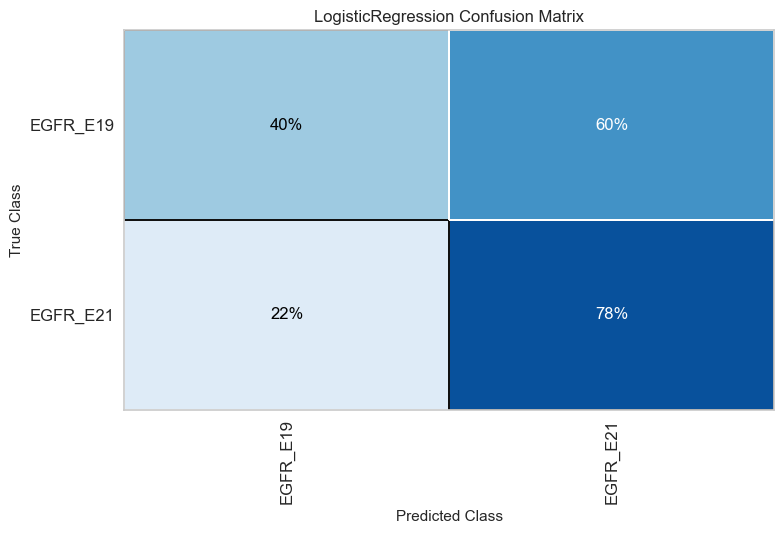

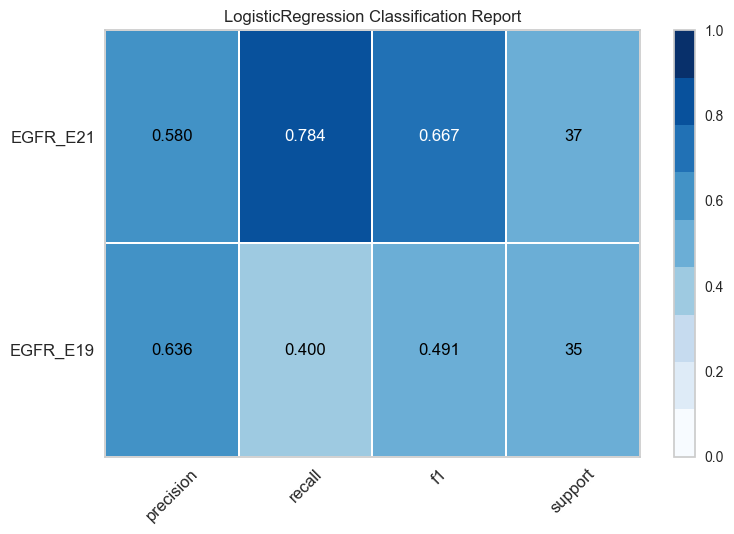

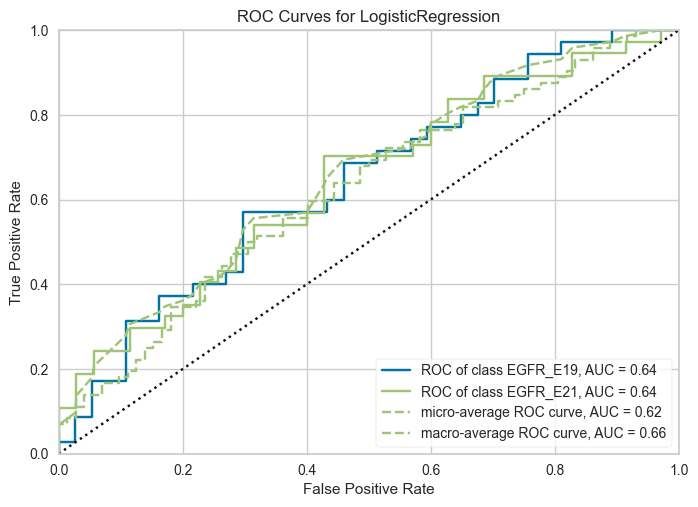

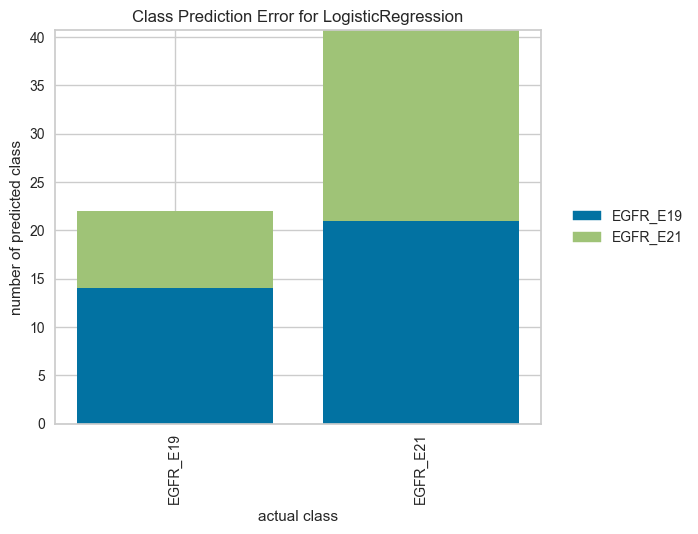

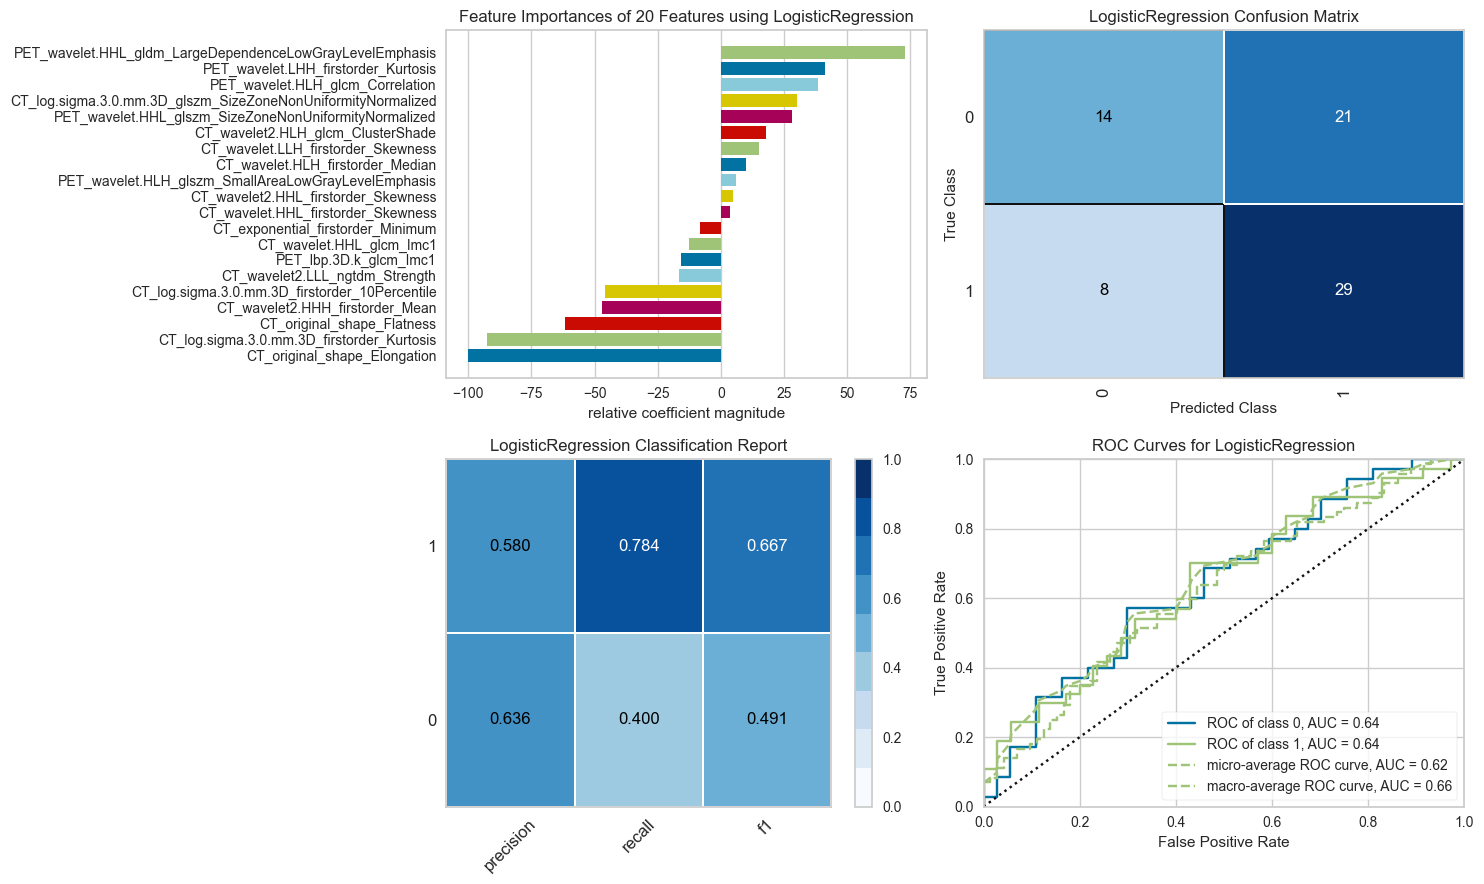

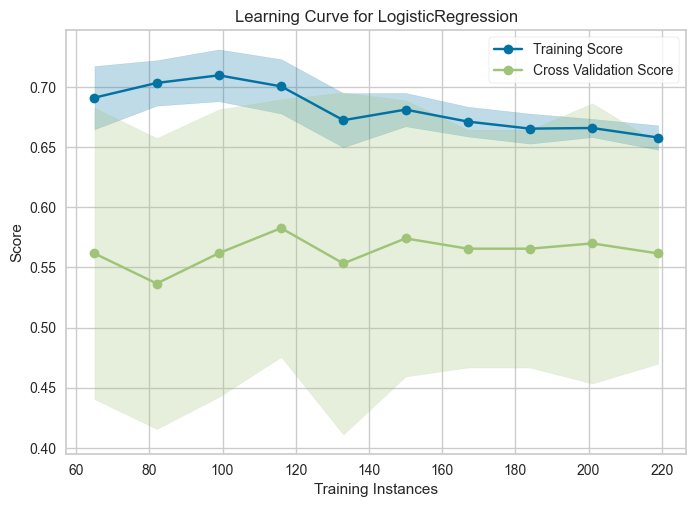

In [33]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [35]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.6617760617760617

In [36]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-KNN20-RF73', Save_format = 'csv',Save_type = 'col')

In [37]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier
import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-KNN20-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.74      0.49      0.59        35
    EGFR E21       0.63      0.84      0.72        37

    accuracy                           0.67        72
   macro avg       0.69      0.66      0.65        72
weighted avg       0.68      0.67      0.66        72

precision 0.6326530612244898 accuracy 0.6666666666666666 recall 0.8378378378378378 auc 0.6617760617760617


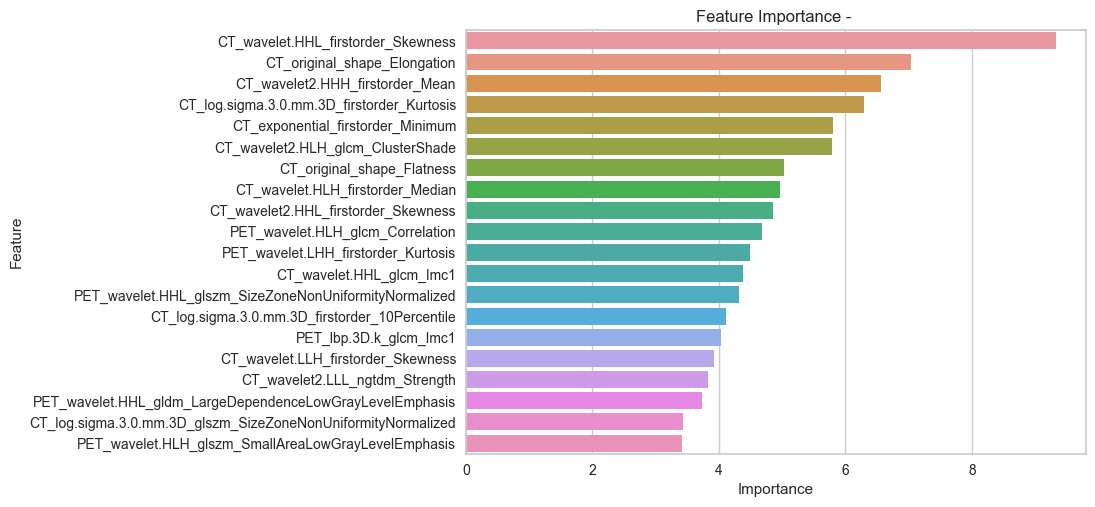

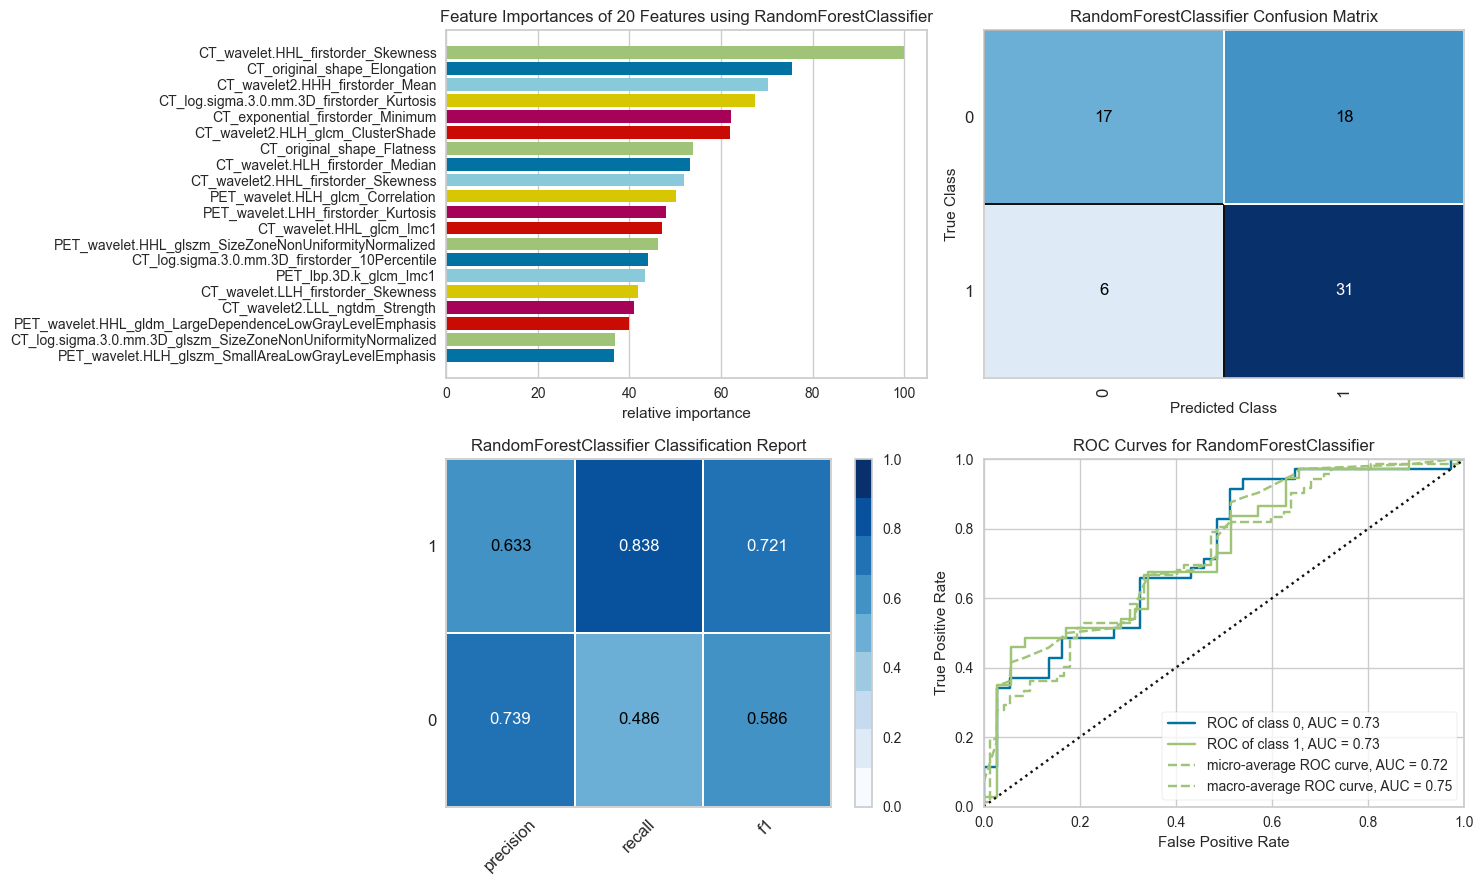

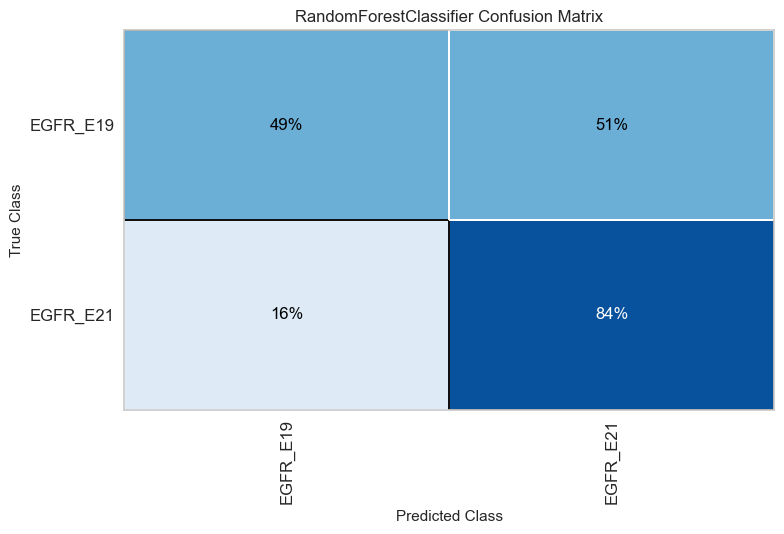

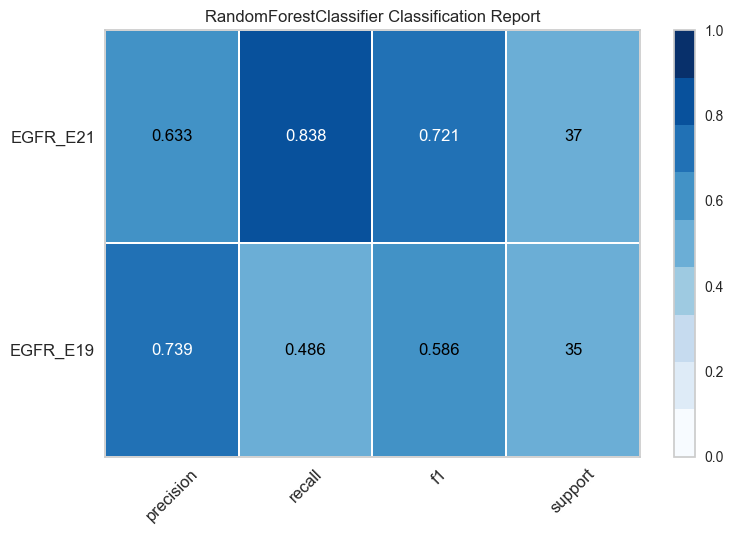

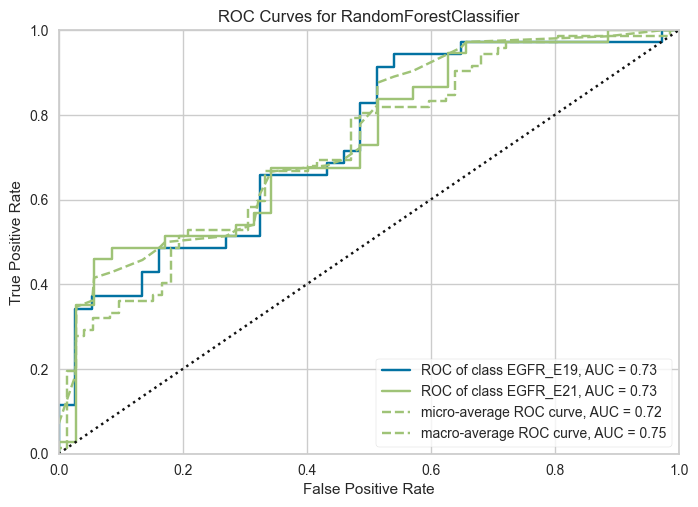

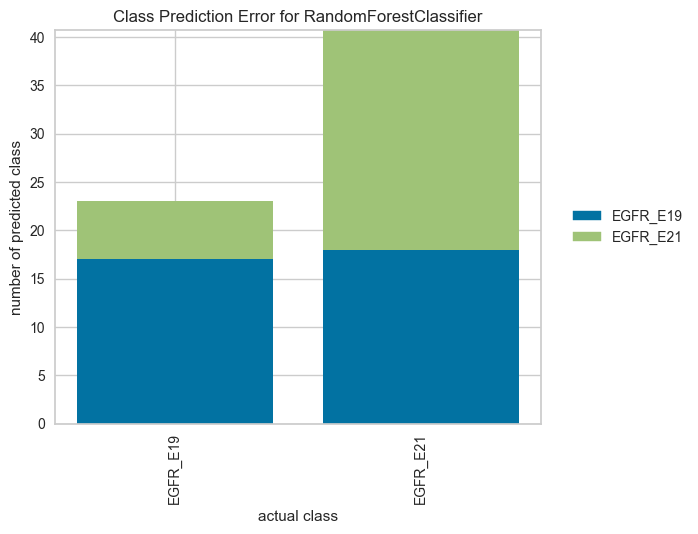

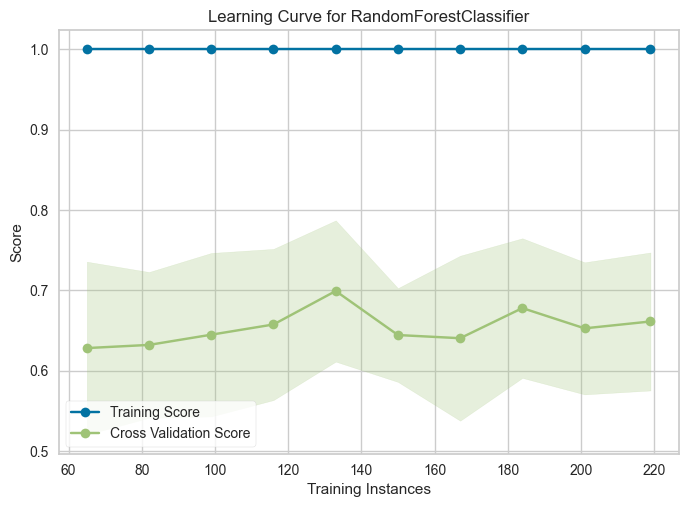

In [38]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [63]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-KNN20-XGB73', Save_format = 'csv',Save_type = 'col')

In [64]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-KNN20-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.67      0.51      0.58        35
    EGFR E21       0.62      0.76      0.68        37

    accuracy                           0.64        72
   macro avg       0.64      0.64      0.63        72
weighted avg       0.64      0.64      0.63        72

precision 0.6222222222222222 accuracy 0.6388888888888888 recall 0.7567567567567568 auc 0.6355212355212355


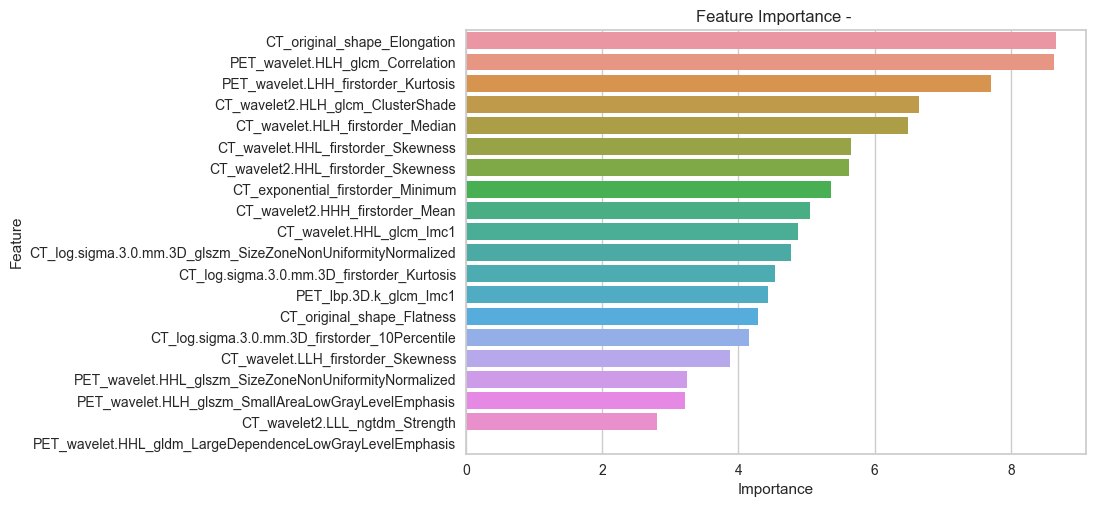

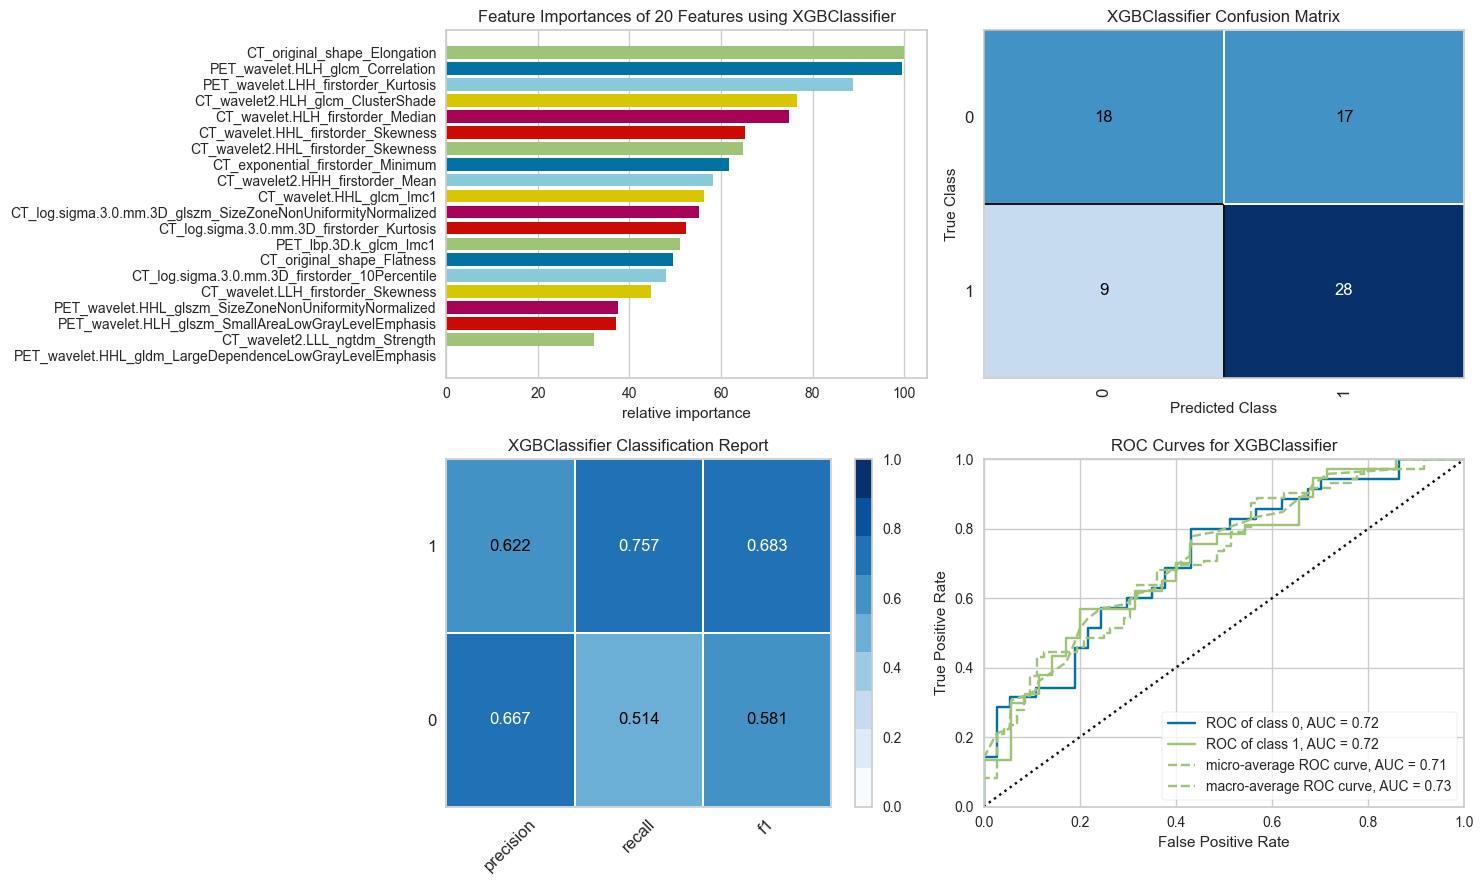

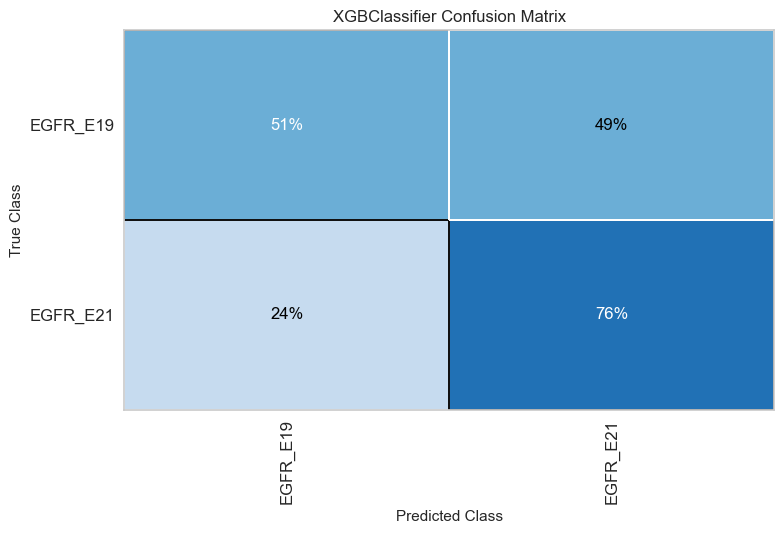

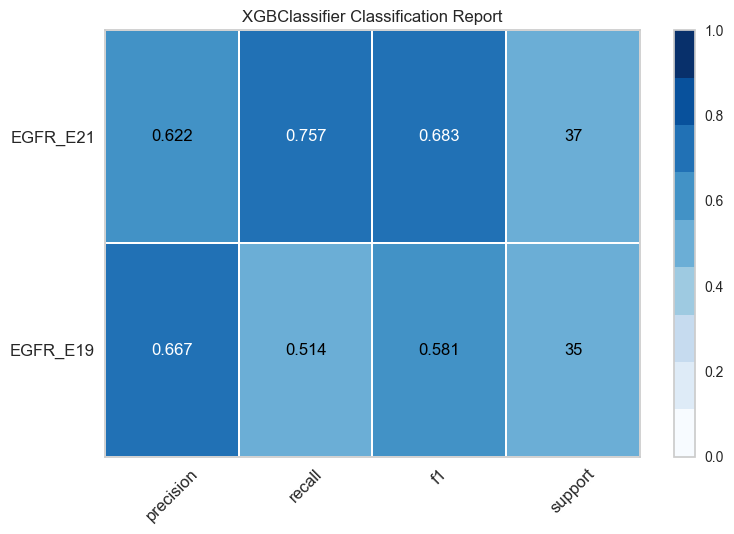

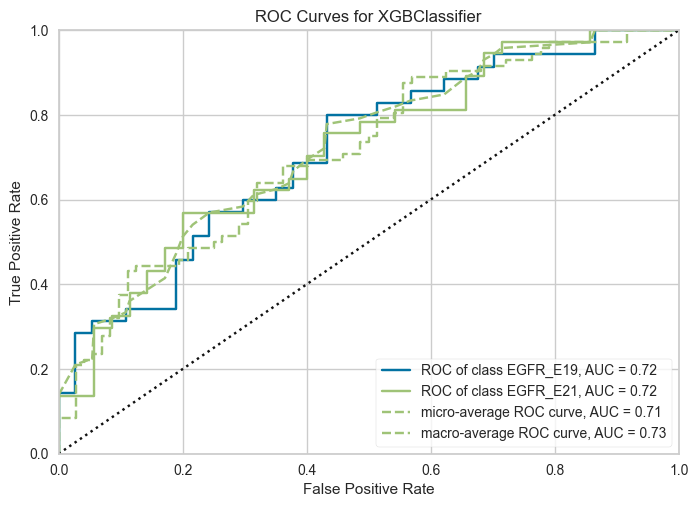

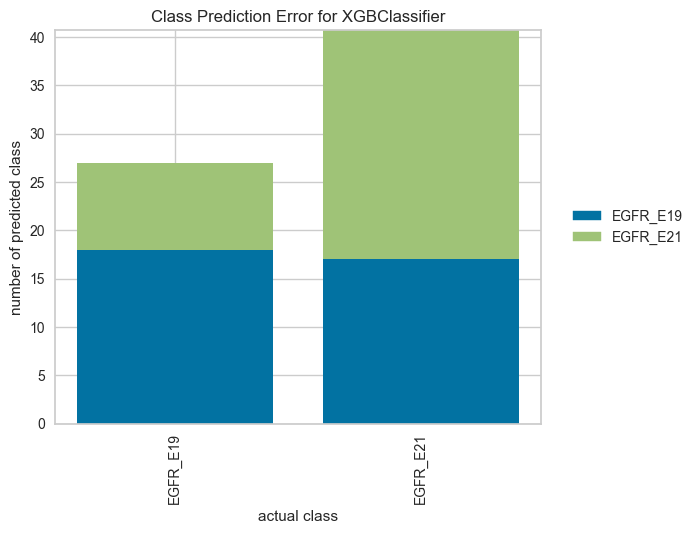

In [65]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [67]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.6805555555555556

In [68]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-KNN20-lgb73', Save_format = 'csv',Save_type = 'col')

In [69]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-KNN20-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.71      0.57      0.63        35
    EGFR E21       0.66      0.78      0.72        37

    accuracy                           0.68        72
   macro avg       0.69      0.68      0.68        72
weighted avg       0.69      0.68      0.68        72

precision 0.6590909090909091 accuracy 0.6805555555555556 recall 0.7837837837837838 auc 0.6776061776061776


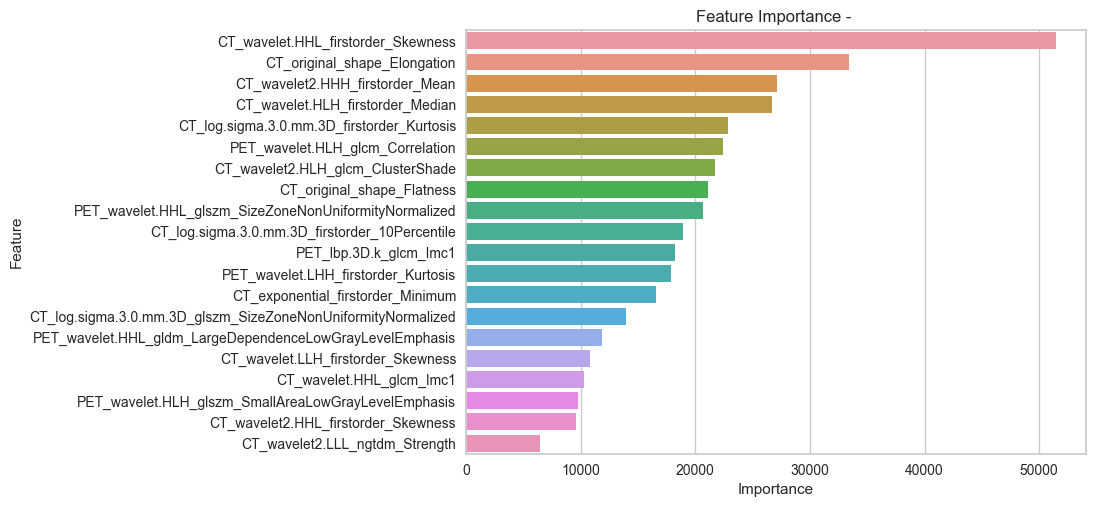

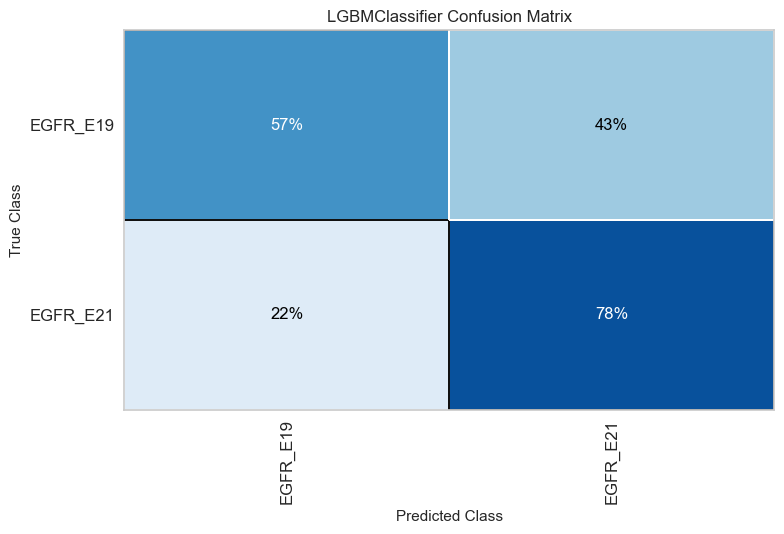

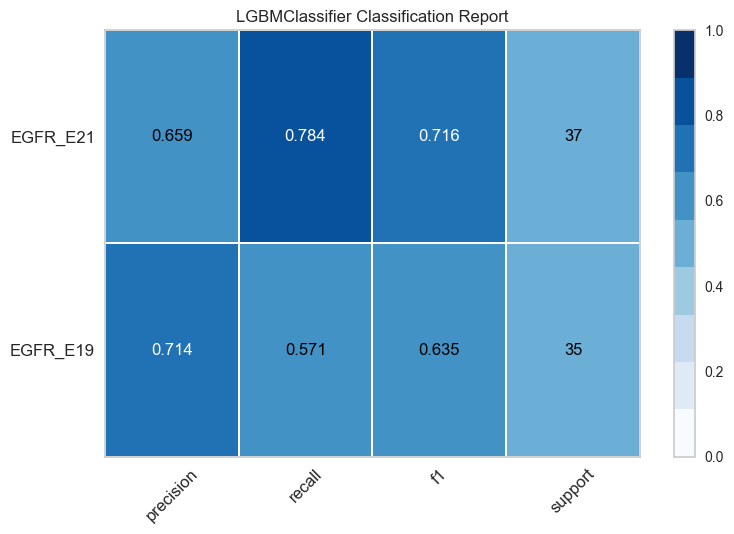

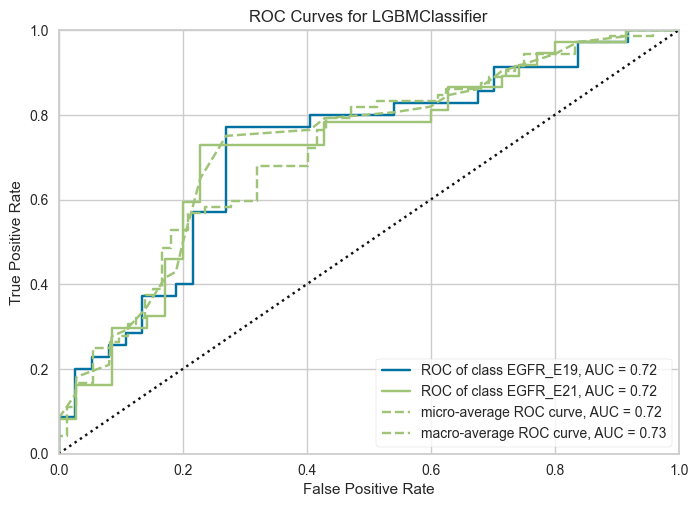

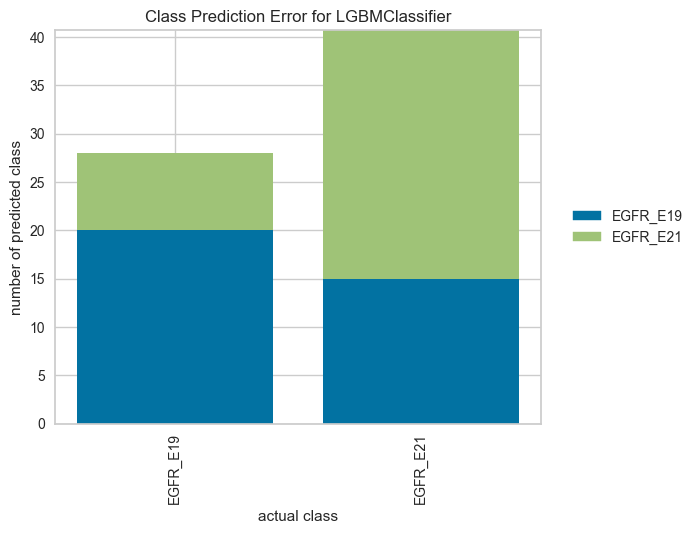

In [70]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.591892
RF: 0.633977
XGBoost: 0.635521
LightGBM: 0.677606
SVM: 0.486486
GBDT: 0.649035
DT: 0.500000
AdaBoost: 0.596525

################ Train and test results for the model: ################

               models  accuracy_train  accuracy_test
0  LogisticRegression           0.636          0.592
1                  RF           1.000          0.634
2             XGBoost           0.925          0.636
3            LightGBM           1.000          0.678
4                 SVM           0.625          0.486
5                GBDT           1.000          0.649
6                  DT           0.500          0.500
7            AdaBoost           0.903          0.597


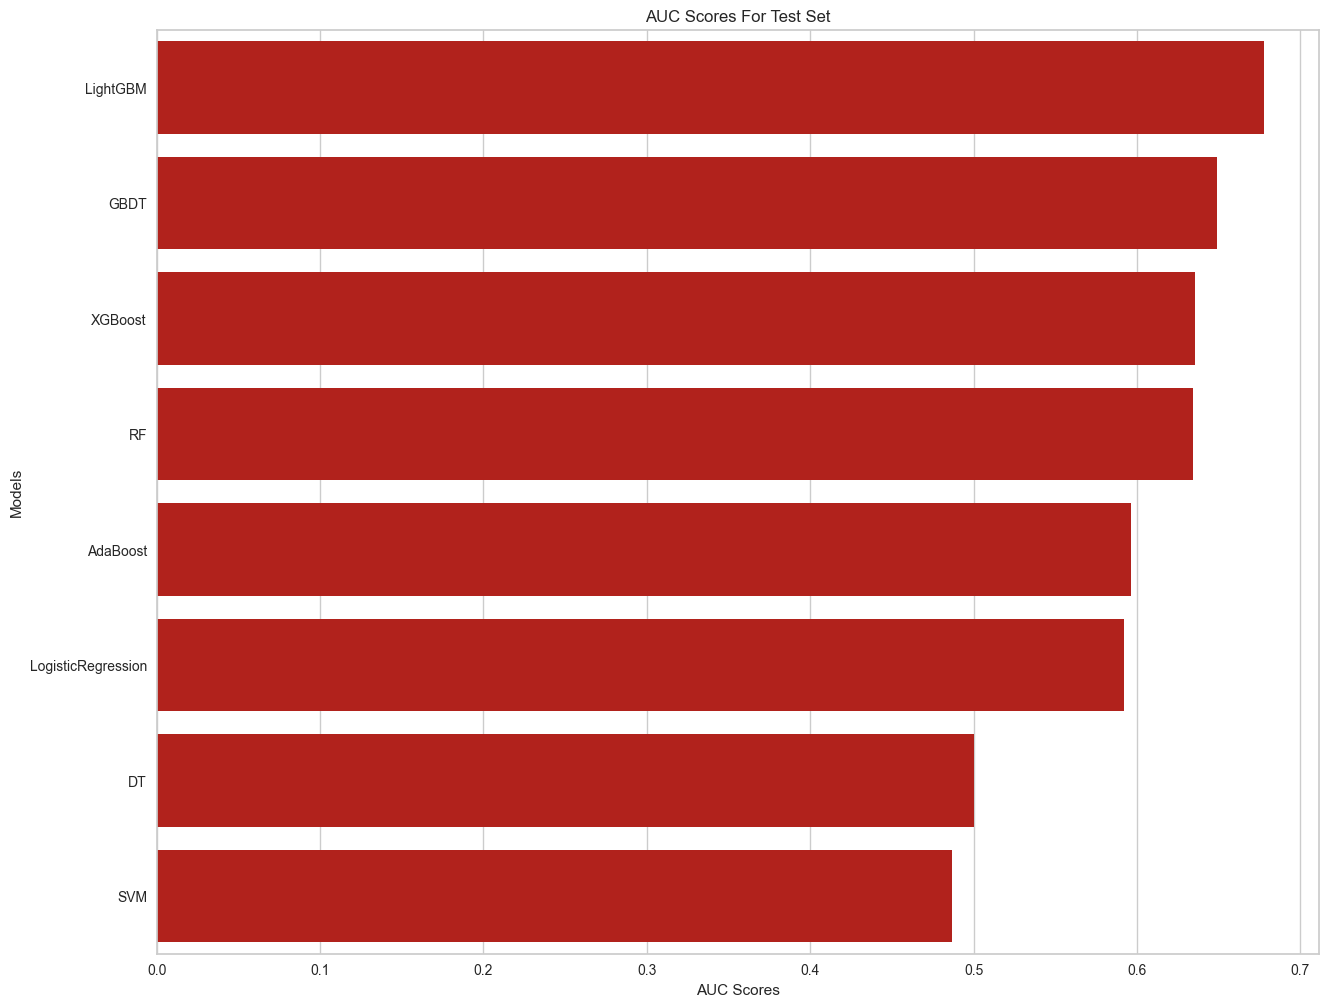

In [72]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [('LogisticRegression', logreg_tuned),
                ('RF', rf_tuned),
                ('XGBoost', xgb_tuned),
                ('LightGBM', lgbm_tuned),
#                ('CatBoost', cb_tuned),
                ('SVM', svm_tuned),
                ('GBDT', gbdt_tuned),
#                 ('NGBoost', ngb_tuned),
                ('DT', dt_tuned),
                ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

In [74]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/KNN20")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [75]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [76]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)


external_test=pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/new2023/testxkZscore-KNN20.csv")
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [77]:
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/test1Zscore-RFERF17-1.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/test1Zscore-RFEGB8.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/test1Zscore-RFERF17-42.csv",index=None)


external_test1=pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/new2023/testrjZscore-KNN20.csv")
external_test_label1 = external_test1.label
# print(external_test_label)
external_test1=external_test1.drop(columns=['label'])

In [78]:
OSPath = 'C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS'

In [87]:
######XGB  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN20/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-KNN20-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.60      0.50      0.55        30
    EGFR_E21       0.61      0.70      0.65        33

    accuracy                           0.60        63
   macro avg       0.60      0.60      0.60        63
weighted avg       0.60      0.60      0.60        63

precision 0.6052631578947368 accuracy 0.6031746031746031 recall 0.696969696969697 auc 0.5984848484848485


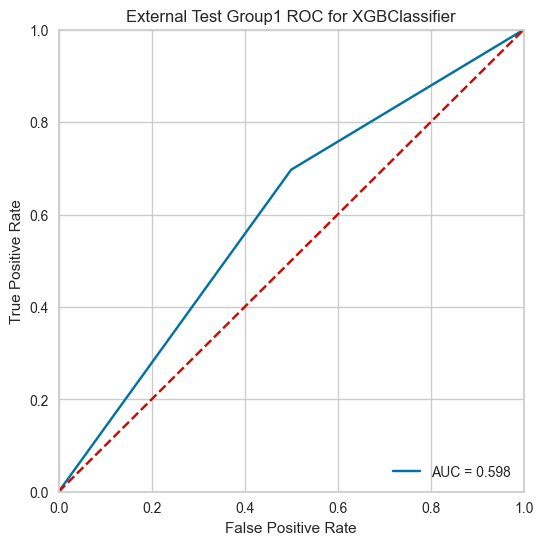

In [88]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [89]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[15 15]
 [10 23]]
Normalized confusion matrix
[[0.5 0.5]
 [0.3 0.7]]


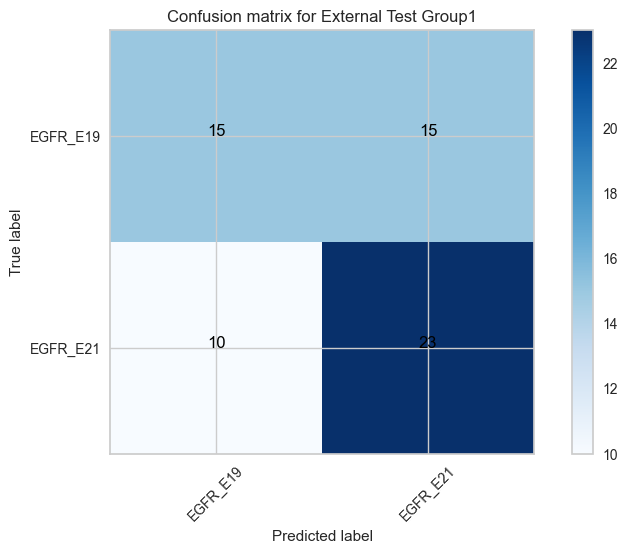

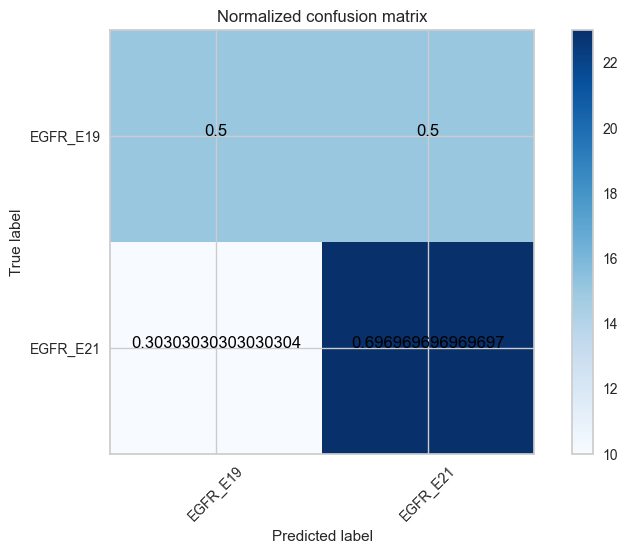

In [90]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [91]:
#####XGB  测试集2

import numpy as np

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN20/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred1=xgb.predict(external_test1)
path = '/RFE-RF-GB/ex-test1-for-auc-dca-xgb-KNN20-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred1, delimiter = ',')

# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test1-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred1, delimiter = ',')
auc = roc_auc_score(external_test_label1, external_test_pred1)
precision = precision_score(external_test_label1, external_test_pred1, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label1, external_test_pred1)
recall = recall_score(external_test_label1, external_test_pred1, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label1, external_test_pred1, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.70      0.59      0.64        27
    EGFR_E21       0.52      0.63      0.57        19

    accuracy                           0.61        46
   macro avg       0.61      0.61      0.61        46
weighted avg       0.62      0.61      0.61        46

precision 0.5217391304347826 accuracy 0.6086956521739131 recall 0.631578947368421 auc 0.6120857699805068


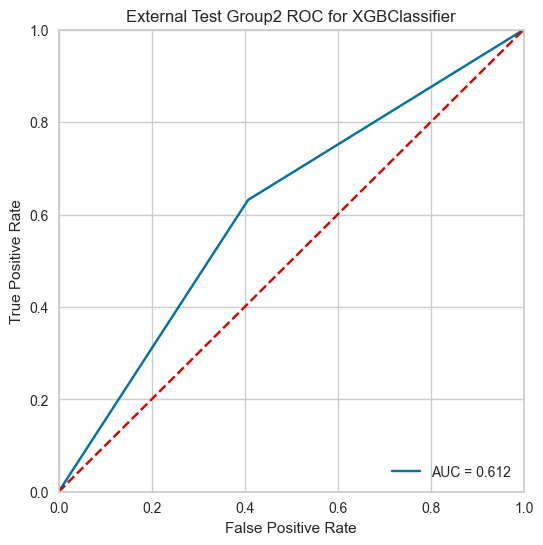

In [92]:
#####XGB  测试集2
fpr, tpr, threshold = metrics.roc_curve(external_test_label1, external_test_pred1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group2 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Confusion matrix, without normalization
[[16 11]
 [ 7 12]]
Normalized confusion matrix
[[0.59 0.41]
 [0.37 0.63]]


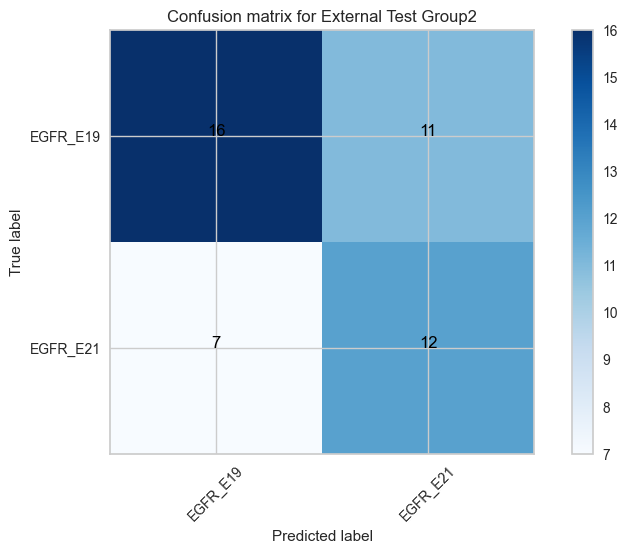

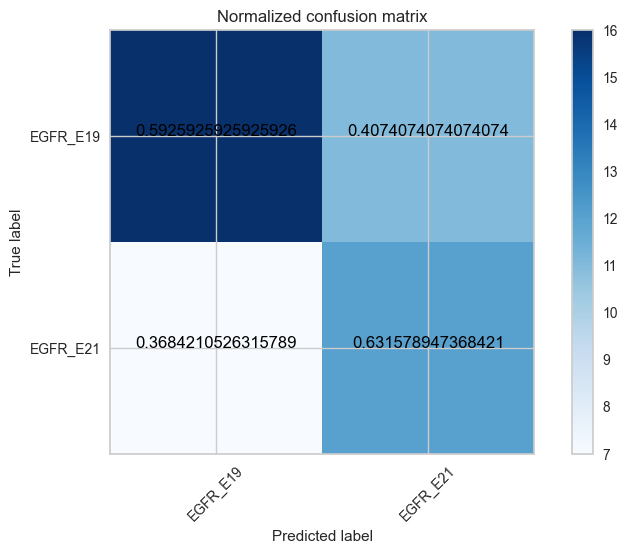

In [93]:
#####XGB  测试集2
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label1, external_test_pred1)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group2')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [94]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN20/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-KNN20-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.48      0.33      0.39        30
    EGFR_E21       0.52      0.67      0.59        33

    accuracy                           0.51        63
   macro avg       0.50      0.50      0.49        63
weighted avg       0.50      0.51      0.49        63

precision 0.5238095238095238 accuracy 0.5079365079365079 recall 0.6666666666666666 auc 0.5


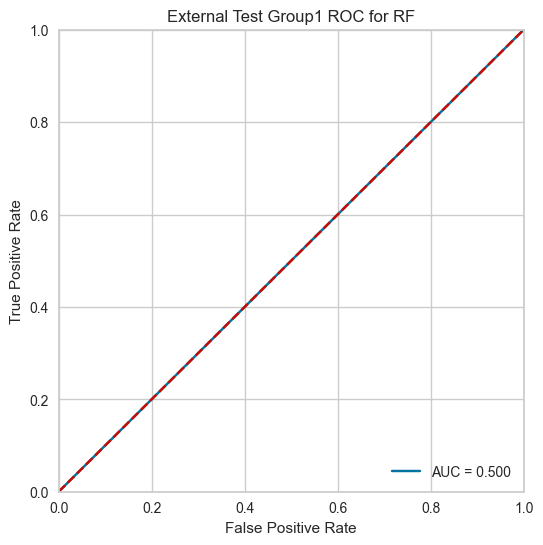

In [95]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[10 20]
 [11 22]]
Normalized confusion matrix
[[0.33 0.67]
 [0.33 0.67]]


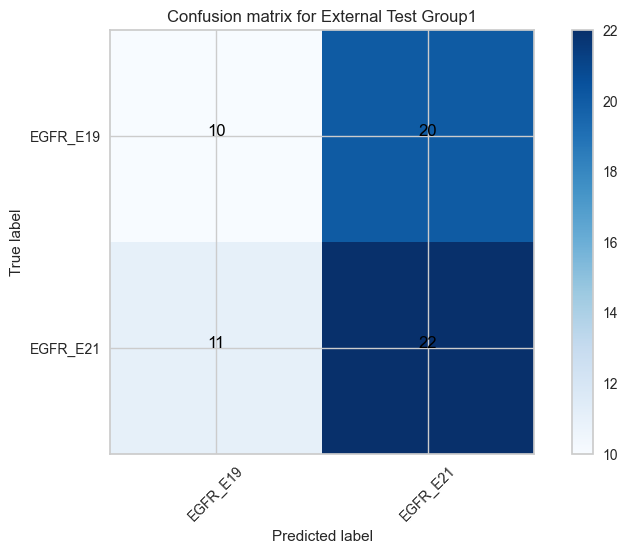

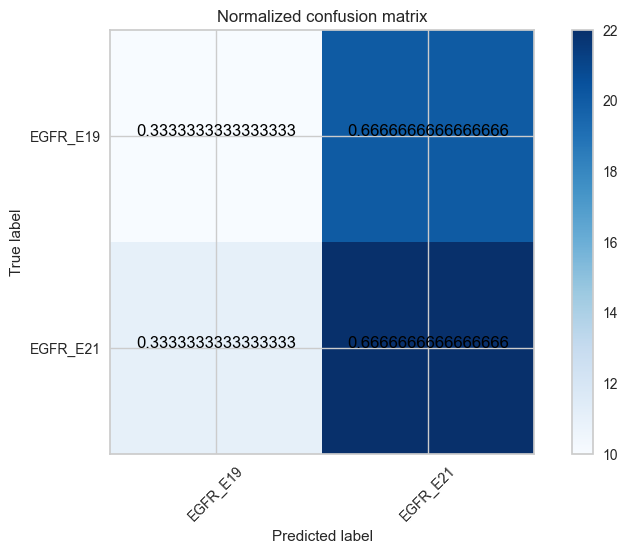

In [96]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [97]:
#####RF  测试集2
import numpy as np
# # Load the model that we saved before

pathpkl = '/RFE-RF-GB/KNN20/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred1=rft.predict(external_test1)
# external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test1-for-auc-dca-RF-KNN20-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred1, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test1-for-auc-dca-RF-RFERF19-73.csv', external_test_pred1, delimiter = ',')
auc = roc_auc_score(external_test_label1, external_test_pred1)
precision = precision_score(external_test_label1, external_test_pred1, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label1, external_test_pred1)
recall = recall_score(external_test_label1, external_test_pred1, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label1, external_test_pred1, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.5135135135135135 accuracy 0.49206349206349204 recall 0.5757575757575758 auc 0.5696969696969697

              precision    recall  f1-score   support

    EGFR_E19       0.65      0.48      0.55        27
    EGFR_E21       0.46      0.63      0.53        19

    accuracy                           0.54        46
   macro avg       0.56      0.56      0.54        46
weighted avg       0.57      0.54      0.54        46

precision 0.46153846153846156 accuracy 0.5434782608695652 recall 0.631578947368421 auc 0.5565302144249513


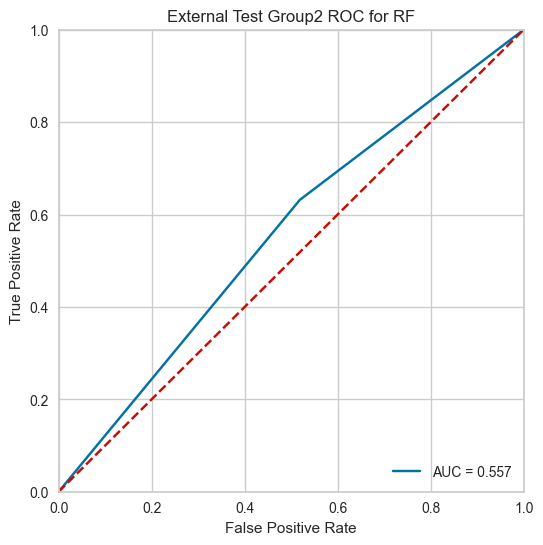

In [98]:
#####rf  测试集2

fpr, tpr, threshold = metrics.roc_curve(external_test_label1, external_test_pred1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group2 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Confusion matrix, without normalization
[[13 14]
 [ 7 12]]
Normalized confusion matrix
[[0.48 0.52]
 [0.37 0.63]]


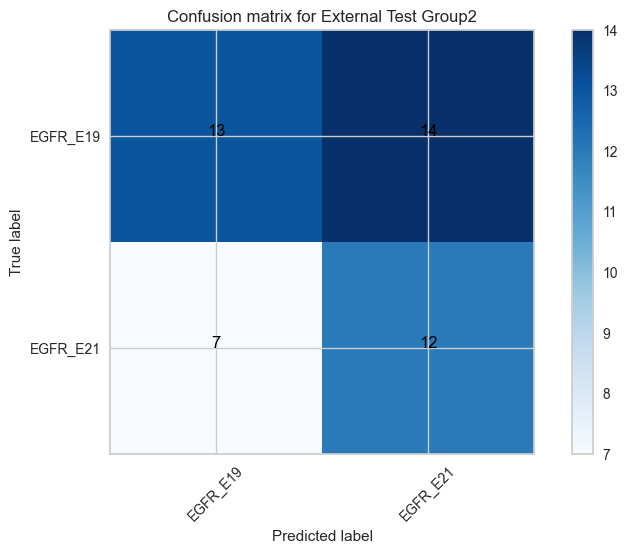

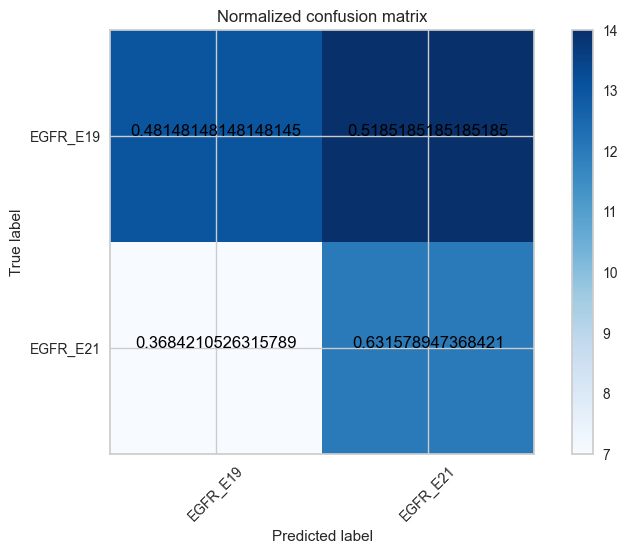

In [99]:
#####rf  测试集2
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label1, external_test_pred1)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group2')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [100]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN20/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-KNN20-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.44      0.27      0.33        30
    EGFR_E21       0.51      0.70      0.59        33

    accuracy                           0.49        63
   macro avg       0.48      0.48      0.46        63
weighted avg       0.48      0.49      0.47        63

precision 0.5111111111111111 accuracy 0.49206349206349204 recall 0.696969696969697 auc 0.4818181818181818


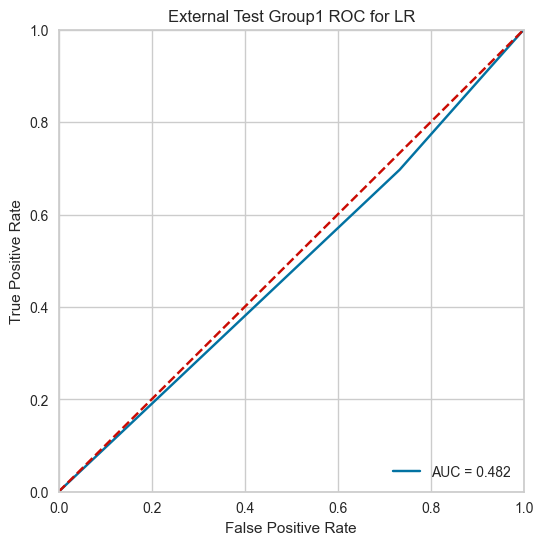

In [101]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 8 22]
 [10 23]]
Normalized confusion matrix
[[0.27 0.73]
 [0.3  0.7 ]]


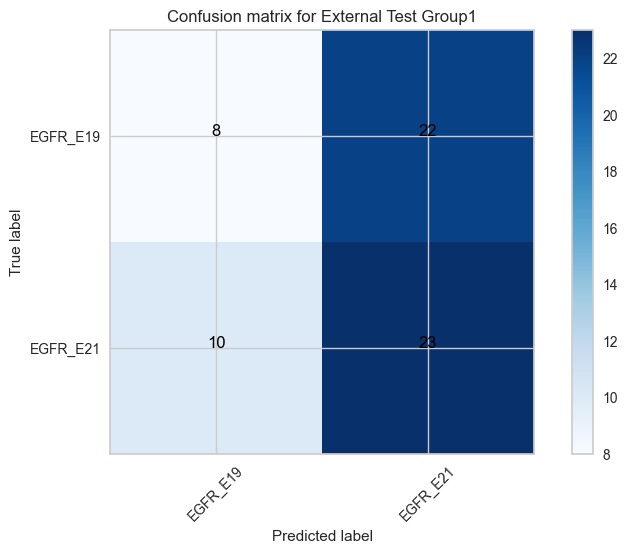

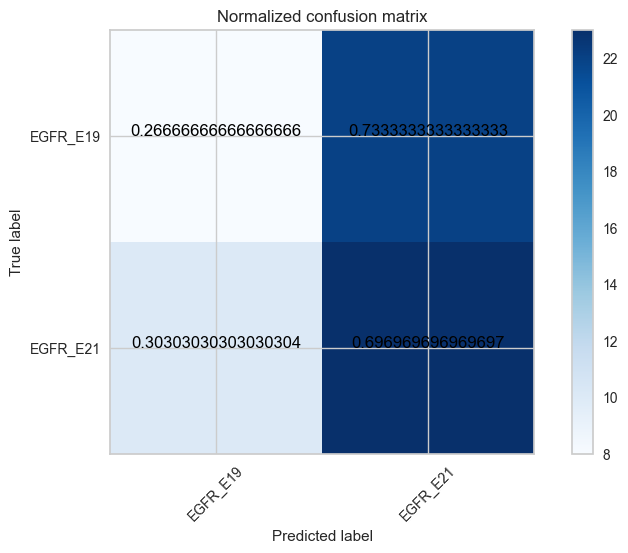

In [102]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [103]:
######LR 测试集2
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN20/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred1=lrt.predict(external_test1)
path = '/RFE-RF-GB/ex-test1-for-auc-dca-lr-KNN20-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred1, delimiter = ',')

# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test1-for-auc-dca-lr-RFERF19-73.csv', external_test_pred1, delimiter = ',')
auc = roc_auc_score(external_test_label1, external_test_pred1)
precision = precision_score(external_test_label1, external_test_pred1, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label1, external_test_pred1)
recall = recall_score(external_test_label1, external_test_pred1, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label1, external_test_pred1, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.79      0.41      0.54        27
    EGFR_E21       0.50      0.84      0.63        19

    accuracy                           0.59        46
   macro avg       0.64      0.62      0.58        46
weighted avg       0.67      0.59      0.57        46

precision 0.5 accuracy 0.5869565217391305 recall 0.8421052631578947 auc 0.6247563352826511


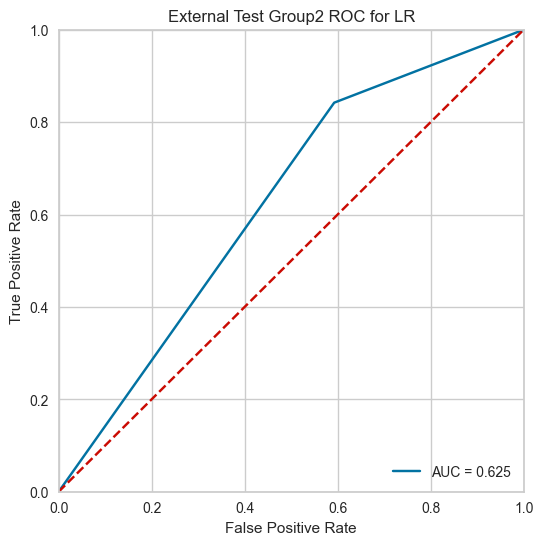

In [104]:
######LR 测试集2
fpr, tpr, threshold = metrics.roc_curve(external_test_label1, external_test_pred1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group2 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[11 16]
 [ 3 16]]
Normalized confusion matrix
[[0.41 0.59]
 [0.16 0.84]]


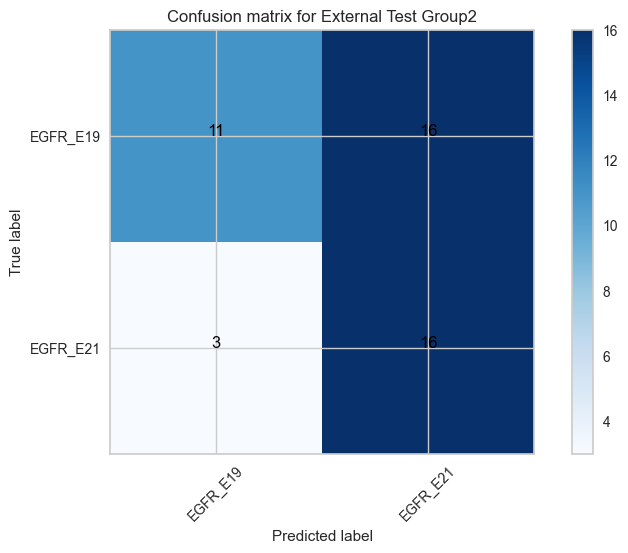

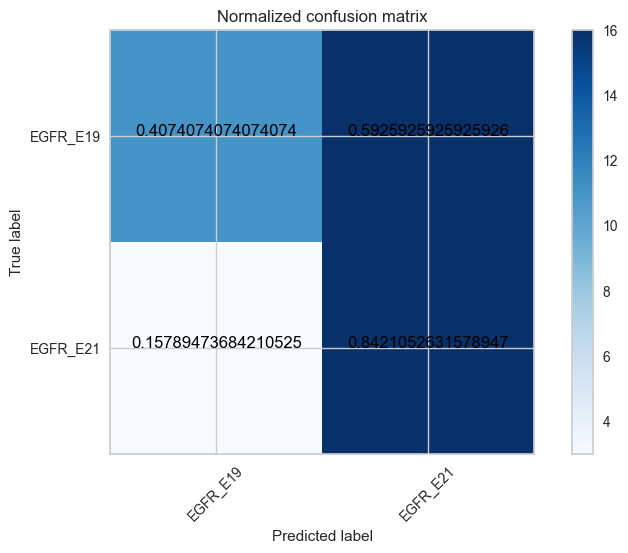

In [105]:
#####LR  测试集2
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label1, external_test_pred1)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group2')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [127]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN20/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-KNN20-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.41      0.30      0.35        30
    EGFR_E21       0.49      0.61      0.54        33

    accuracy                           0.46        63
   macro avg       0.45      0.45      0.44        63
weighted avg       0.45      0.46      0.45        63

precision 0.4878048780487805 accuracy 0.4603174603174603 recall 0.6060606060606061 auc 0.45303030303030306


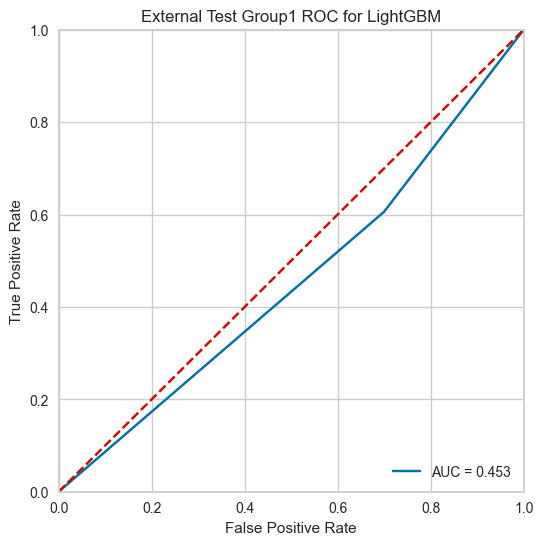

In [128]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 9 21]
 [13 20]]
Normalized confusion matrix
[[0.3  0.7 ]
 [0.39 0.61]]


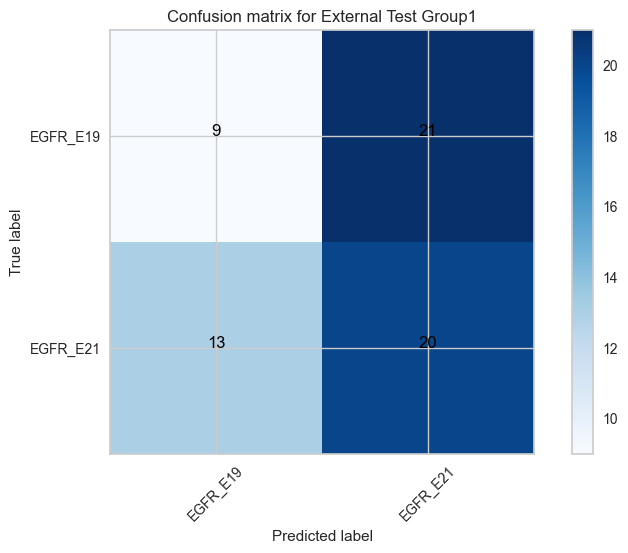

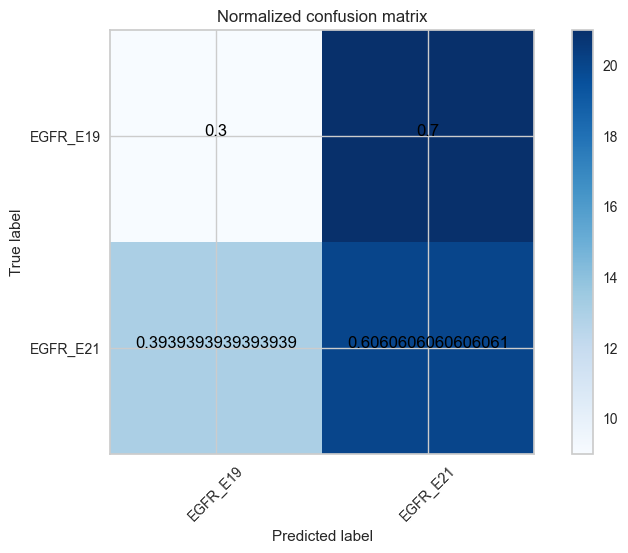

In [129]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [130]:
#lgb 测试集2
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN20/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred1=lgbt.predict(external_test1)
path = '/RFE-RF-GB/ex-test1-for-auc-dca-lgb-KNN20-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred1, delimiter = ',')

# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred1=lgbt.predict(external_test1)

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test1-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred1, delimiter = ',')
auc = roc_auc_score(external_test_label1, external_test_pred1)
precision = precision_score(external_test_label1, external_test_pred1, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label1, external_test_pred1)
recall = recall_score(external_test_label1, external_test_pred1, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label1, external_test_pred1, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.60      0.44      0.51        27
    EGFR_E21       0.42      0.58      0.49        19

    accuracy                           0.50        46
   macro avg       0.51      0.51      0.50        46
weighted avg       0.53      0.50      0.50        46

precision 0.4230769230769231 accuracy 0.5 recall 0.5789473684210527 auc 0.5116959064327485


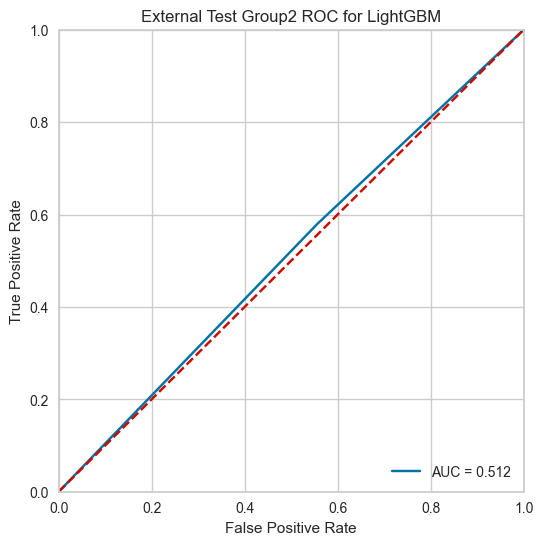

In [131]:
#lgb 测试集2
fpr, tpr, threshold = metrics.roc_curve(external_test_label1, external_test_pred1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group2 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[12 15]
 [ 8 11]]
Normalized confusion matrix
[[0.44 0.56]
 [0.42 0.58]]


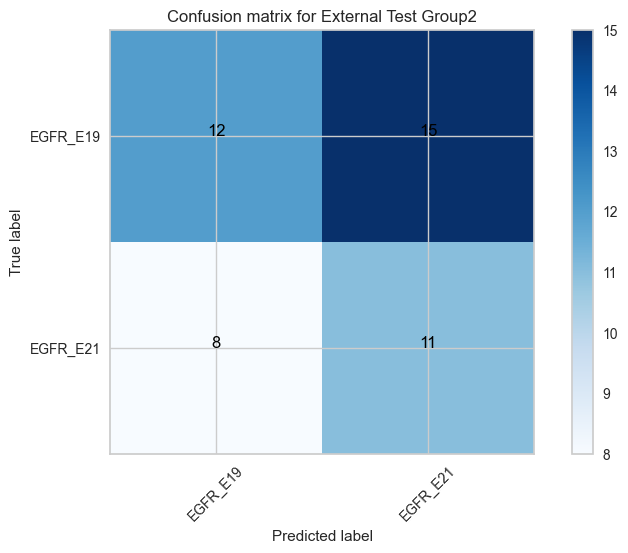

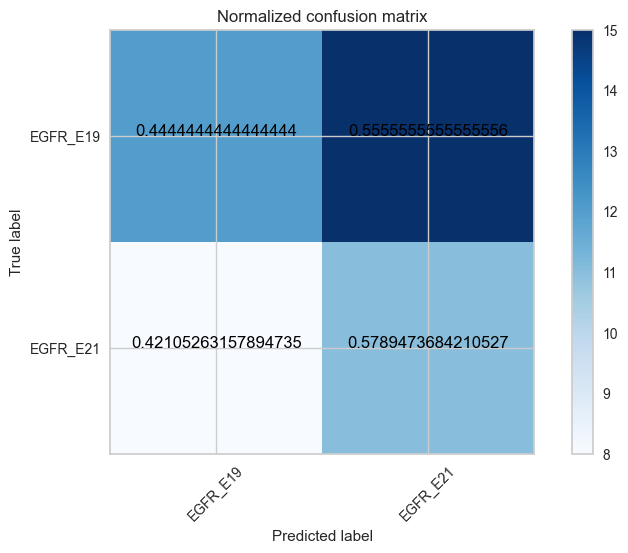

In [132]:
#####LGB  测试集2
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label1, external_test_pred1)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group2')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [133]:
# # Visualization of Results --> Feature Importances
# plot_feature_importances(lgbt)
# # report_results_quickly(lgbm_tuned)
# plot_results(lgbt)
# # plot_learning_curve(lgbm_tuned)